# nltk 모듈을 이용한 이름 분석

## 이름 코퍼스 초기 설정

In [2]:
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

## 상남자 이름 분석

In [3]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
# [w for w in male_names if not w in female_names]

## 이름 알파벳 분포 분석 (남성)

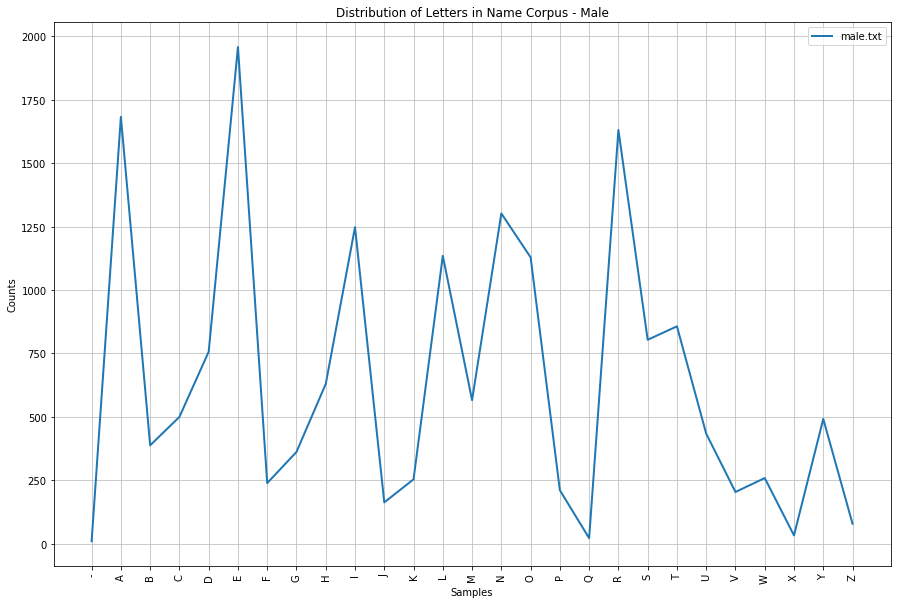

In [4]:
cfd = nltk.ConditionalFreqDist(('male.txt', letter.upper()) \
                               for name in names.words('male.txt') \
                               for letter in name)



plt.figure(figsize=(15, 10))
cfd.plot(title='Distribution of Letters in Name Corpus - Male')

## 이름 알파벳 분포 분석 (여성)

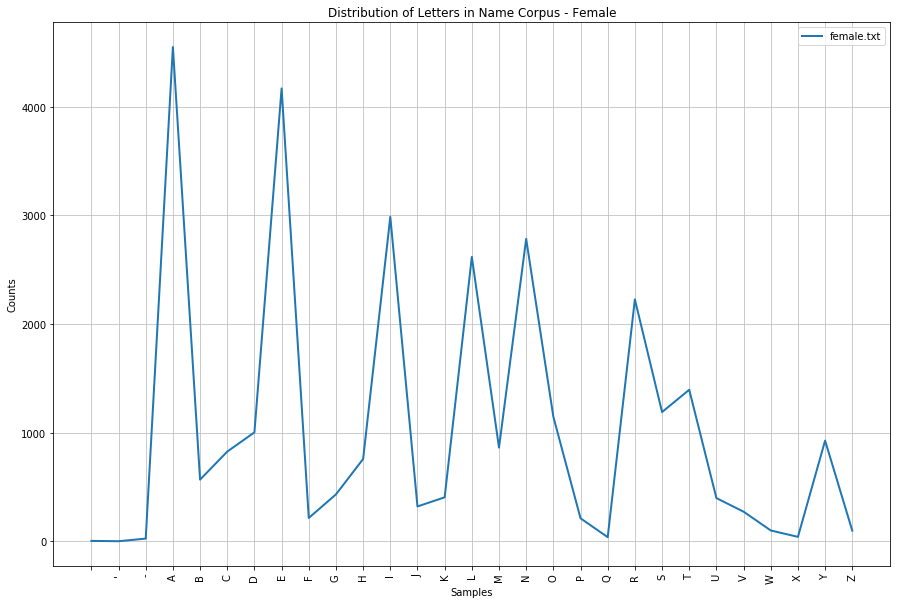

In [5]:
cfd = nltk.ConditionalFreqDist(('female.txt', letter.upper()) \
                               for name in names.words('female.txt') \
                               for letter in name)
plt.figure(figsize=(15, 10))
cfd.plot(title='Distribution of Letters in Name Corpus - Female')

## 이름 알파벳 분포 분석 (남성/여성, 맨 앞 글자)

all name of males: 2943
all name of females: 5001
2333 male names and 2333 female names are sampled automatically.


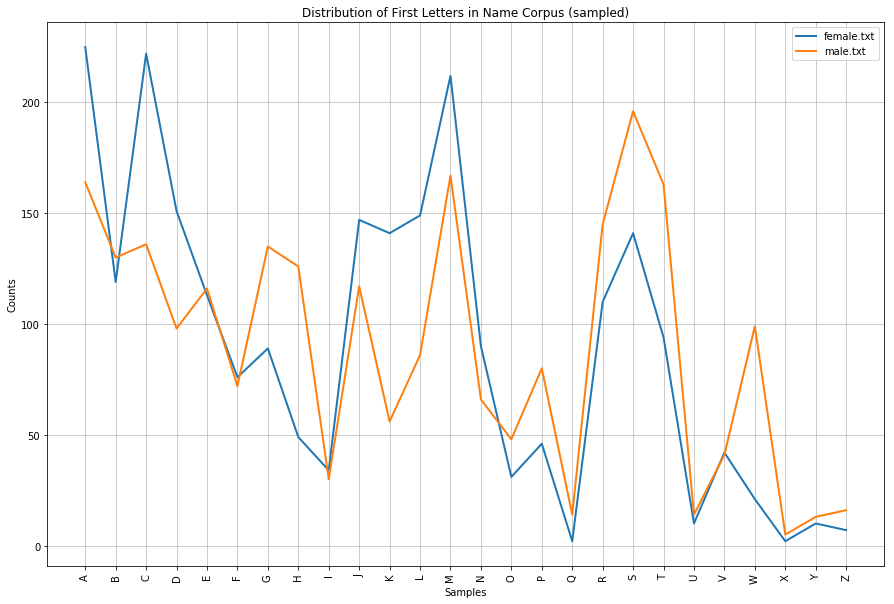

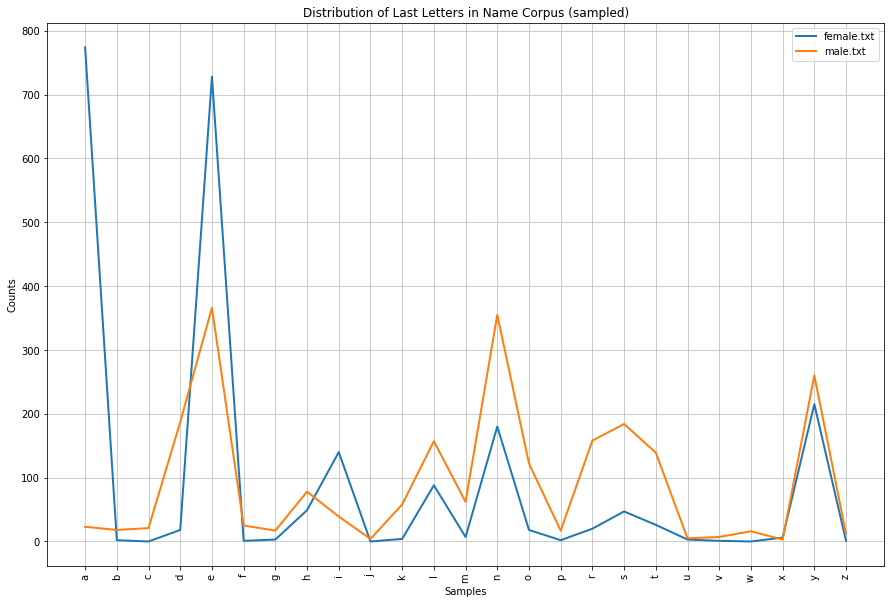

In [1]:
import nltk
import matplotlib.pyplot as plt
import numpy
import time
%matplotlib inline
names = nltk.corpus.names
samples = numpy.random.randint(1000, len(names.words('male.txt'))-1, 1)[0]
rand_male = numpy.random.randint(0, len(names.words('male.txt'))-1, samples)
rand_female = numpy.random.randint(0, len(names.words('female.txt'))-1, samples)
rand_index = {'male.txt' : rand_male, \
              'female.txt' : rand_female}
print('all name of males:', len(names.words('male.txt')))
# print('samples of males: ', [names.words('male.txt')[i] for i in rand_male])
print('all name of females:', len(names.words('female.txt')))
# print('samples of males: ', [names.words('female.txt')[i] for i in rand_female])
print(samples, 'male names and', samples, 'female names are sampled automatically.')

cfd = nltk.ConditionalFreqDist((fileid, names.words(fileid)[i][0]) \
                               for fileid in names.fileids() \
                               for i in rand_index[fileid])
plt.figure(figsize=(15, 10))
cfd.plot(title='Distribution of First Letters in Name Corpus (sampled)')

cfd = nltk.ConditionalFreqDist((fileid, names.words(fileid)[i][-1]) \
                               for fileid in names.fileids() \
                               for i in rand_index[fileid])
plt.figure(figsize=(15, 10))
cfd.plot(title='Distribution of Last Letters in Name Corpus (sampled)')

## 이름 알파벳 분포 분석 (전체)

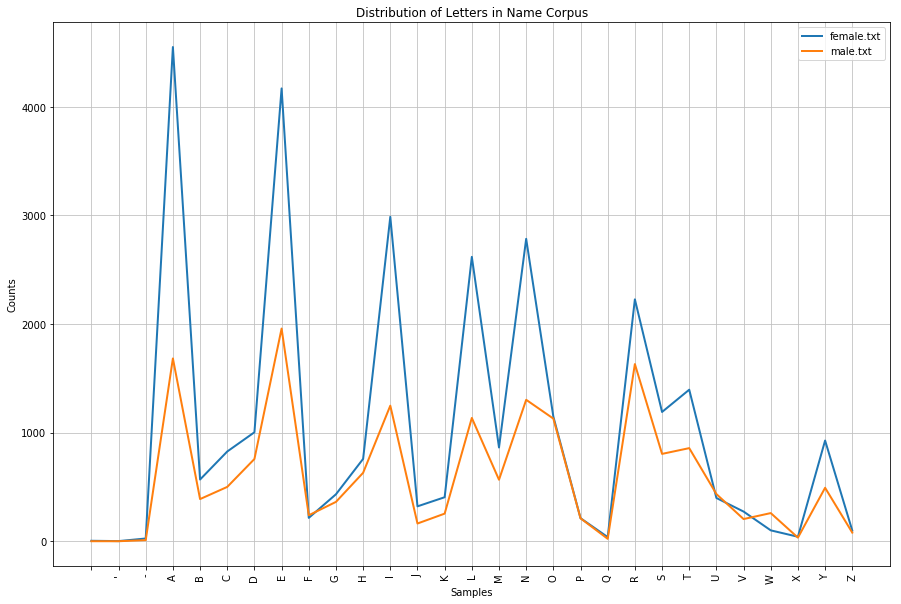

In [31]:
cfd = nltk.ConditionalFreqDist((fileid, letter.upper()) \
                               for fileid in names.fileids() \
                               for name in names.words(fileid) \
                               for letter in name)
plt.figure(figsize=(15, 10))
cfd.plot(title='Distribution of Letters in Name Corpus')

shortest: 2 letters
longest: 15 letters
전체 표본: 7944
평균: 6.03285498489426
표준편차: 1.5669204780747796


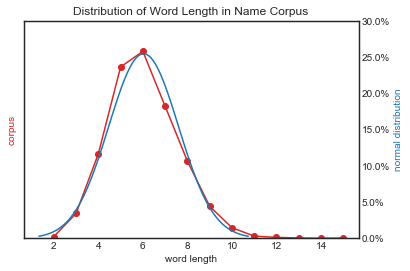

In [26]:
import nltk
import math
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
len_list = [len(w) for w in nltk.corpus.names.words()]
len_list.sort()
print('shortest:', len_list[0], 'letters')
print('longest:', len_list[-1], 'letters')
print('전체 표본:', len(len_list))
print('평균:', np.mean(len_list))
print('표준편차:', np.std(len_list))


fig, ax1 = plt.subplots()
ax1.set_xlabel('word length')
ax1.set_ylabel('corpus', color= 'tab:red')
ax1.plot(pd.Series(len_list).value_counts(sort=False).sort_index(ascending=True), label="corpus", linestyle='-', marker='o', color='tab:red')
ax1.yaxis.set_major_formatter(PercentFormatter(xmax=len(len_list), decimals=None, symbol='%', is_latex=False))
ax1.set_ylim(0, len(len_list)*0.3)
ax1.set_yticklabels([])

ax2 = ax1.twinx()
mu = np.mean(len_list)
sigma =np.std(len_list)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax2.plot(x, stats.norm.pdf(x, mu, sigma), label="normal distribution", linestyle='-', marker='', color='tab:blue')
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
ax2.set_ylabel('normal distribution', color='tab:blue')
ax2.set_ylim(0, 0.3)

plt.title('Distribution of Word Length in Name Corpus')
plt.show()

# nltk, pandas를 이용한 이름, 어휘 분석 및 시각화

## 어휘, 이름(남성, 여성, 전체) 알파벳 분포 분석 (pandas)

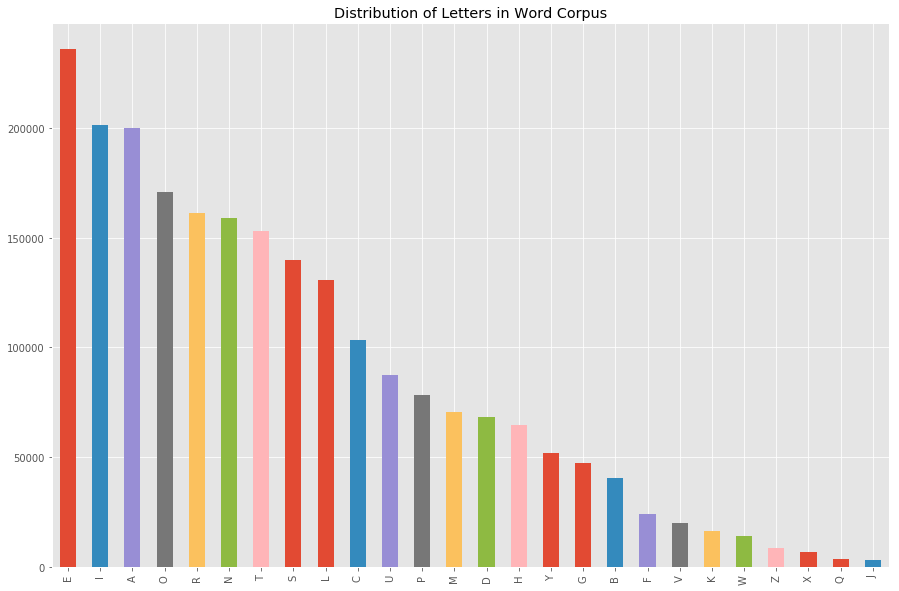

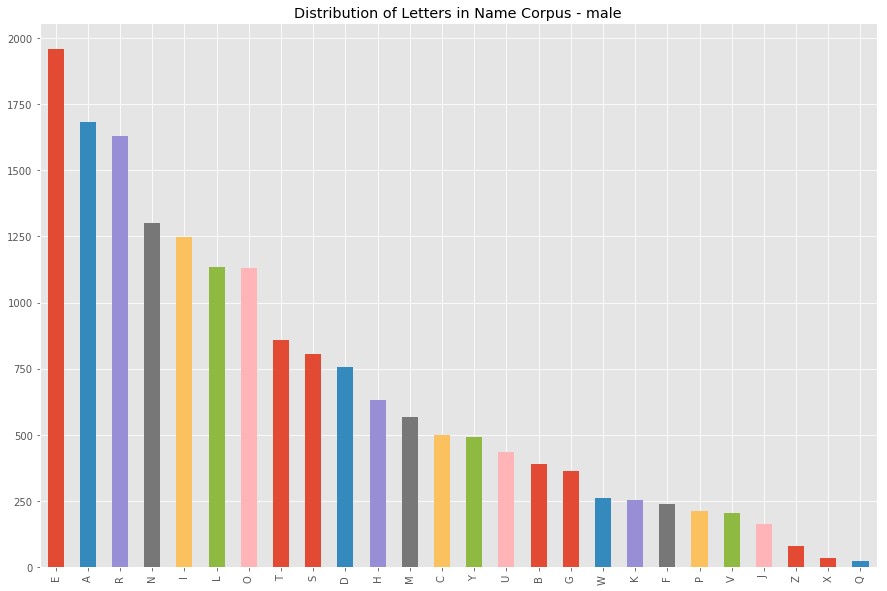

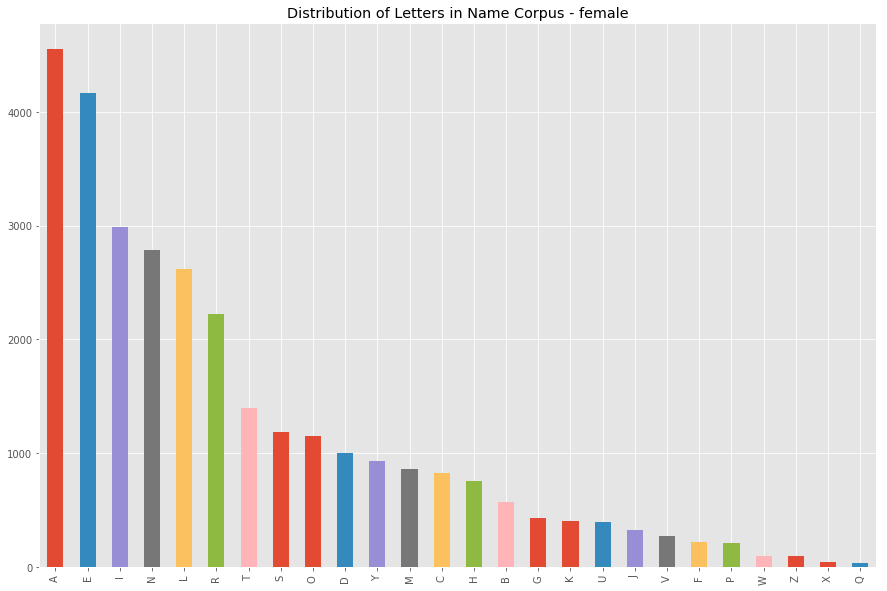

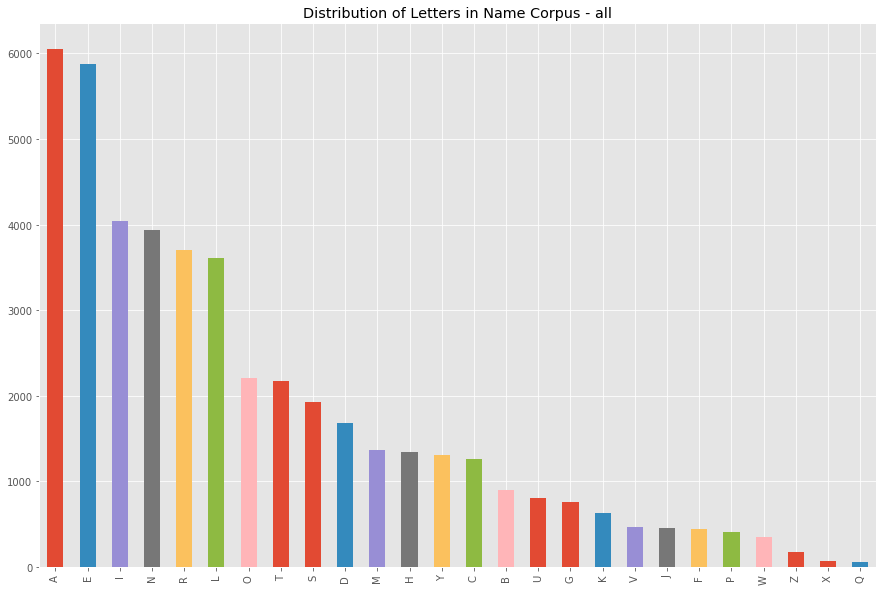

In [7]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

names = nltk.corpus.names
abclist = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

male_names = names.words('male.txt')
male_letters = [l.upper() for w in male_names for l in w if l.upper() in abclist]

female_names = names.words('female.txt')
female_letters = [l.upper() for w in female_names for l in w if l.upper() in abclist]

names_list = [w for w in male_names] + [w for w in female_names if not w in male_names]
names_letters = [l.upper() for w in names_list for l in w if l.upper() in abclist]
# print(names_letters)

words_list = nltk.corpus.words.words()
words_letters = [l.upper() for w in words_list for l in w if l.upper() in abclist]

df0 = pd.Series(words_letters)
plt.figure(figsize=(15, 10))
df0.value_counts().plot.bar()
plt.title('Distribution of Letters in Word Corpus')
plt.savefig('dist0.png', dpi=400, bbox_inches='tight')
plt.show()



df1 = pd.Series(male_letters)
plt.figure(figsize=(15, 10))
df1.value_counts().plot.bar()
plt.title('Distribution of Letters in Name Corpus - male')
plt.savefig('dist1.png', dpi=400, bbox_inches='tight')
plt.show()

df2 = pd.Series(female_letters)
plt.figure(figsize=(15, 10))
df2.value_counts().plot.bar()
plt.title('Distribution of Letters in Name Corpus - female')
plt.savefig('dist2.png', dpi=400, bbox_inches='tight')
plt.show()

df3 = pd.Series(names_letters)
plt.figure(figsize=(15, 10))
df3.value_counts().plot.bar()
plt.title('Distribution of Letters in Name Corpus - all')
plt.savefig('dist3.png', dpi=400, bbox_inches='tight')
plt.show()

## 이름 알파벳 분포 분석 - 성별 비교 (pandas)

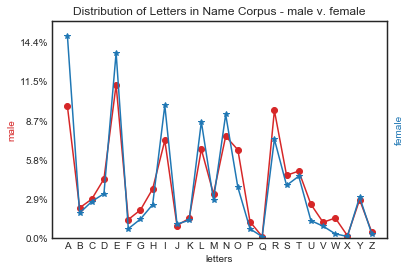

In [14]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

%matplotlib inline
plt.style.use('seaborn-white')

# 성별 비교

names = nltk.corpus.names
abclist = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

male_names = names.words('male.txt')
male_letters = [l.upper() for w in male_names for l in w if l.upper() in abclist]

female_names = names.words('female.txt')
female_letters = [l.upper() for w in female_names for l in w if l.upper() in abclist]

df_m = pd.Series(male_letters).value_counts(sort=False).sort_index(ascending=True)
df_f = pd.Series(female_letters).value_counts(sort=False).sort_index(ascending=True)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('letters')
ax1.set_ylabel('male', color=color)
ax1.plot(df_m, label="male", linestyle='-', marker='o', color=color)
# ax1.set_xticklabels([])
ax1.yaxis.set_major_formatter(PercentFormatter(xmax=len(male_letters), decimals=None, symbol='%', is_latex=False))
ax1.set_ylim(0, len(male_letters)*0.16)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('female', color=color)
ax2.plot(df_f, label="female", linestyle='-', marker='*', color=color)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=len(female_letters), decimals=None, symbol='%', is_latex=False))
ax2.set_ylim(0, len(female_letters)*0.16)
ax2.set_yticklabels([])
plt.title('Distribution of Letters in Name Corpus - male v. female')
plt.savefig('dist4.png', dpi=400, bbox_inches='tight')
plt.show()

## 이름 알파벳 분포 분석 - 명사 어휘 분포와 비교 (pandas)

45992 letters from 7579 names
average 6.07 letters per a name
2261673 letters from 236736 words
average 9.55 letters per a word


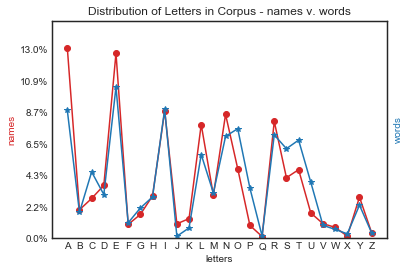

In [19]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

# 이름 가져오기

names = nltk.corpus.names
abclist = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

male_names = names.words('male.txt')
female_names = names.words('female.txt')

names_list = [w for w in male_names] + [w for w in female_names if not w in male_names]
names_letters = [l.upper() for w in names_list for l in w if l.upper() in abclist]

# 단어 가져오기

words_list = nltk.corpus.words.words()
words_letters = [l.upper() for w in words_list for l in w if l.upper() in abclist]

print(len(names_letters), 'letters from', len(names_list), 'names')
print('average', round(len(names_letters) / len(names_list), 2), 'letters per a name')
print(len(words_letters), 'letters from', len(words_list) , 'words')
print('average', round(len(words_letters) / len(words_list), 2), 'letters per a word')



fig, ax1 = plt.subplots()

df_names = pd.Series(names_letters).value_counts(sort=False).sort_index(ascending=True)
df_words = pd.Series(words_letters).value_counts(sort=False).sort_index(ascending=True)

color = 'tab:red'
ax1.set_xlabel('letters')
ax1.set_ylabel('names', color=color)
ax1.plot(df_names, label="names", linestyle='-', marker='o', color=color)
# ax1.set_xticklabels([])
ax1.yaxis.set_major_formatter(PercentFormatter(xmax=len(names_letters), decimals=None, symbol='%', is_latex=False))
ax1.set_ylim(0, len(names_letters)*0.15)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('words', color=color)
ax2.plot(df_words, label="words", linestyle='-', marker='*', color=color)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=len(words_letters), decimals=None, symbol='%', is_latex=False))
ax2.set_ylim(0, len(words_letters)*0.15)
ax2.set_yticklabels([])
plt.title('Distribution of Letters in Corpus - names v. words')
plt.savefig('dist5.png', dpi=400, bbox_inches='tight')
plt.show()

## 어휘 분포 가지고 놀기

shortest: 1 letters
longest: 24 letters
전체 표본: 236736
평균: 9.553574445796162
표준편차: 2.935570844519216


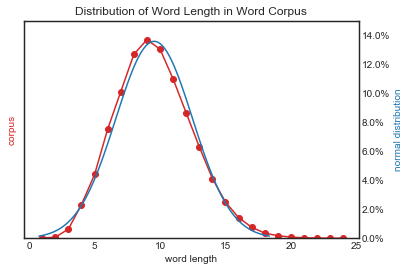

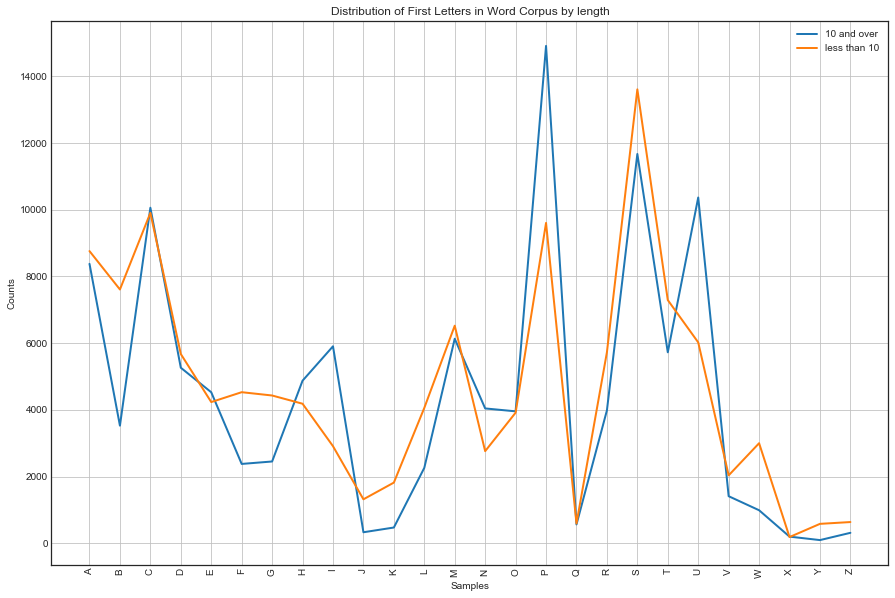

In [28]:
import nltk
import math
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
len_list = [len(w) for w in nltk.corpus.words.words()]
len_list.sort()
print('shortest:', len_list[0], 'letters')
print('longest:', len_list[-1], 'letters')
print('전체 표본:', len(len_list))
print('평균:', np.mean(len_list))
print('표준편차:', np.std(len_list))


fig, ax1 = plt.subplots()
ax1.set_xlabel('word length')
ax1.set_ylabel('corpus', color= 'tab:red')
ax1.plot(pd.Series(len_list).value_counts(sort=False).sort_index(ascending=True), label="corpus", linestyle='-', marker='o', color='tab:red')
ax1.yaxis.set_major_formatter(PercentFormatter(xmax=len(len_list), decimals=None, symbol='%', is_latex=False))
ax1.set_ylim(0, len(len_list)*0.15)
ax1.set_yticklabels([])

ax2 = ax1.twinx()
mu = np.mean(len_list)
sigma =np.std(len_list)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax2.plot(x, stats.norm.pdf(x, mu, sigma), label="normal distribution", linestyle='-', marker='', color='tab:blue')
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
ax2.set_ylabel('normal distribution', color='tab:blue')
ax2.set_ylim(0, 0.15)

plt.title('Distribution of Word Length in Word Corpus')
plt.show()

legend1 = {True: 'less than 10', False: '10 and over'}

cfd = nltk.ConditionalFreqDist((legend1[len(words) < 10], words[0].upper()) \
                               for words in nltk.corpus.words.words())
plt.figure(figsize=(15, 10))
cfd.plot(title='Distribution of First Letters in Word Corpus by length')

# WordCloud 사용해서 나타내기

## 이름 알파벳 분포 분석 - 명사 어휘 분포와 비교 (pandas)

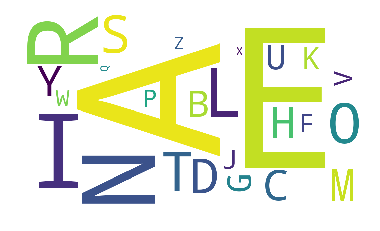

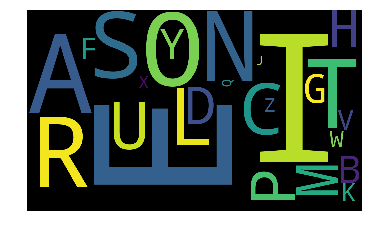

In [7]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(pd.Series(names_letters).value_counts()))
plt.axis("off")
plt.show()

wc = WordCloud(width=1000, height=600, background_color="black", random_state=0)
plt.imshow(wc.generate_from_frequencies(pd.Series(words_letters).value_counts()))
plt.axis("off")
plt.show()

## 이름 빈도 분석 - 랜덤 (numpy)

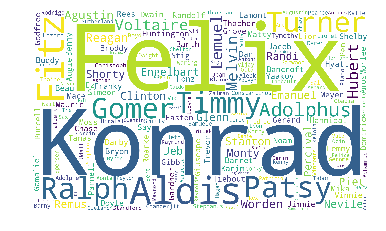

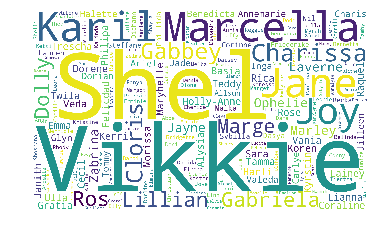

In [8]:
import numpy as np

names = nltk.corpus.names

male_names = names.words('male.txt')
female_names = names.words('female.txt')

male_dict = {key: value for key, value in zip(male_names, np.random.rand(len(male_names)))}
female_dict = {key: value for key, value in zip(female_names, np.random.rand(len(female_names)))}

wc = WordCloud(width=2000, height=1200, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(male_dict))
plt.axis("off")
plt.savefig('namefreq_male.png', dpi=400, bbox_inches='tight')
plt.show()

wc = WordCloud(width=2000, height=1200, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(female_dict))
plt.axis("off")
plt.savefig('namefreq_female.png', dpi=400, bbox_inches='tight')
plt.show()